Ejercicio 5

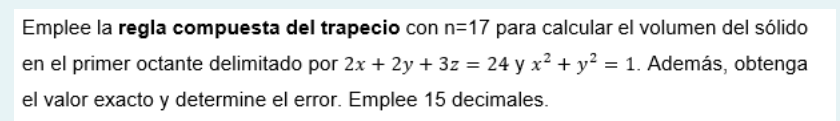

Proyecto en geogebra

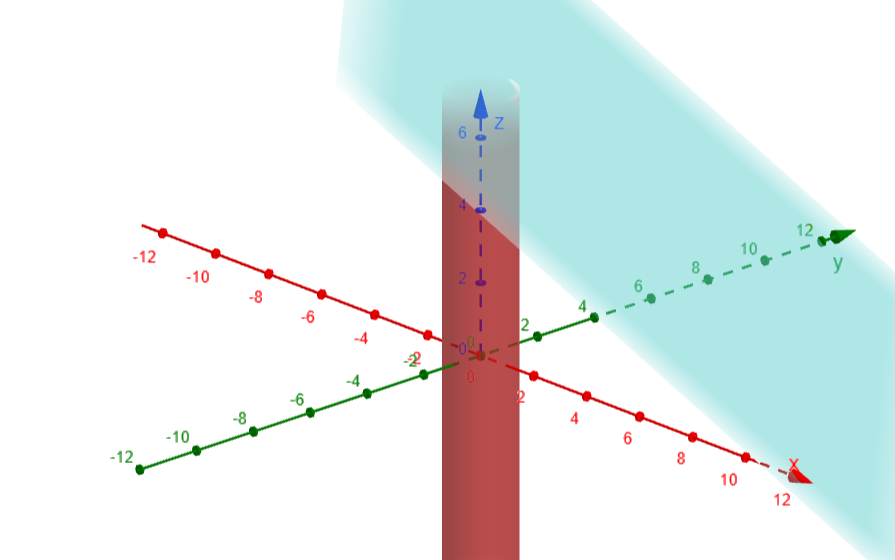

Se puede ver que el plano opaca el cilindro, pero se ve la parte a integra.

Proyecto en 2d en el plano xy
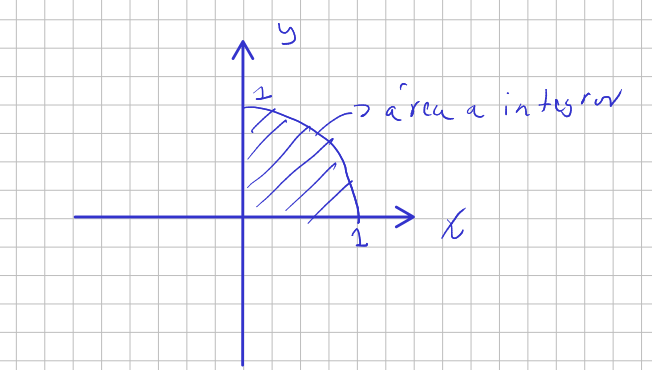

Con la proyección se aprecia que está limitado arriba por *2x + 2y + 3z = 24* y que lo acota el cilindro *x<sup>2</sup> + y<sup>2</sup> = 1*, esto proyectado en el plano *xy*, despejo en el plano y tengo:

$$ x^2 + y^2 = 1 $$

$$ y = \sqrt{(1-x^2)} $$

despejo z:

$$ z = 8 - \frac{2x}{3} - \frac{2y}{3} $$

Nos daría un cuarto de círculo de radio = 1, por lo tanto la integral sería:

$$ \int_{0}^{1} \int_{0}^{\sqrt{(1-x^2)}} (8 - \frac{2x}{3} - \frac{2y}{3}) dy dx  $$

Ahora soluciono en Python



In [17]:
from sympy import *

x = symbols("x")
y = symbols("y")

f =  8 - ((2*x)/ 3) - ((2*y)/3)

a=0
b=sqrt(1-x**2)
n=17

# Defino una función compuesta del trapecio, Primero para mi variable y

def regla_compuesta_del_trapecio_y(f, a, b, n):
    # Defino mi h dentro de la función
    h = (b-a) / n
    # La suma interna es el factor de la fórmula, la inicio con f(y_0)
    suma_interna = f.subs(y, a)
    # Aquí hago la sumatoria desde f(y_1) hasta f(y_(n-1)) 
    for i in range(1, n):
        suma_interna += 2 * f.subs(y, a + i*h)
    # Sumo f(y_n)
    suma_interna += f.subs(y, b)
    return (h/2) * suma_interna



integral_interna= regla_compuesta_del_trapecio_y(f=f, a=a, b=b, n=n)
print("La integral interna es", integral_interna)

La integral interna es sqrt(1 - x**2)*(-68*x/3 - 34*sqrt(1 - x**2)/3 + 272)/34


In [18]:
# Ahora defino la función para la segunda integral

def regla_compuesta_del_trapecio(f, a, b, n):
    # Defino mi h dentro de la función
    h = (b-a) / n
    # La suma interna es el factor de la fórmula, la inicio con f(x_0)
    suma_interna = f.subs(x, a)
    # Aquí hago la sumatoria desde f(x_1) hasta f(x_(n-1)) 
    for i in range(1, n):
        suma_interna += 2 * f.subs(x, a + i*h)
    # Sumo f(x_n)
    suma_interna += f.subs(x, b)
    return (h/2) * suma_interna

# Defino los límites de la integral interna
c= 0
d=1

valor_aproximado = regla_compuesta_del_trapecio(integral_interna, c, d, n)
print("El valor aproximado es:", valor_aproximado)

El valor aproximado es: 5.80840165962666


In [19]:
# Calculamos valor exacto y error

valor_exacto = round(
    float(integrate(integrate(f, (y, a, b)), (x, c, d))), 15
    )
print("El valor exacto es:", valor_exacto)

error = abs(valor_aproximado-valor_exacto)
print("El Error es:", error)

El valor exacto es: 5.838740862735142
El Error es: 0.0303392031084826


In [20]:
# Determinamos el error

error = abs(valor_exacto - valor_aproximado )
print("El error es:", error)

El error es: 0.0303392031084826
